<a href="https://colab.research.google.com/github/SulaksanaHS/ML-A11.2023.15135-UAS/blob/main/LogisticRegression_Prediksi_Diabetes_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDIKSI RISIKO DIABETES MODEL LOGISTIK REGRESSION MENGGUNAKAN MACHINE LEARNING**

NIM : A11.2023.15135

Nama : Sulaksana Himawan Saputra

Kelompok : A11.4406

**RINGKASAN**

Diabetes merupakan masalah kesehatan global yang signifikan, mempengaruhi kualitas hidup individu dan menimbulkan beban ekonomi dan sosial. Machine Learning (Pembelajaran Mesin) adalah cabang dari kecerdasan buatan yang berfokus pada pengembangan algoritma untuk komputer belajar dari data dan membuat keputusan atau melakukan tugas tanpa pemrograman eksplisit.

Logistik Regresi adalah metode statistik yang digunakan untuk menganalisis hubungan antara variabel prediktor dan variabel respons yang bersifat biner. Penelitian ini bertujuan menerapkan algoritma logistik regresi dalam sistem cerdas untuk memprediksi risiko diabetes. Dalam penelitian ini, dibuat model prediksi menggunakan Logistic Regression di Python (Jupyter Notebook) untuk deteksi dini diabetes, berdasarkan data awal pasien.

Dataset yang digunakan adalah Pima Indians Diabetes Database yang terdiri dari 768 data pasien, dengan delapan fitur dan satu label (diabetes atau tidak). Metode CRISP-DM digunakan sebagai kerangka kerja proyek ini. Hasil model menunjukkan akurasi sebesar 73%, yang diharapkan dapat membantu masyarakat dan tenaga medis dalam identifikasi awal risiko diabetes.

**PERMASALAHAN**

Banyak orang tidak menyadari bahwa mereka memiliki risiko diabetes sampai gejala muncul di tahap lanjut. Tanpa deteksi dini, diabetes dapat menyebabkan komplikasi serius. Maka dibutuhkan sistem prediksi sederhana dan cepat untuk membantu identifikasi risiko secara otomatis berdasarkan data kesehatan dasar.

**TUJUAN**

- Memprediksi risiko diabetes menggunakan model machine learning yang sederhana.
- Mengidentifikasi fitur kesehatan penting seperti glukosa, BMI, dan tekanan darah.
- Menilai kinerja model dengan metrik seperti akurasi dan confusion matrix.

**MODEL**

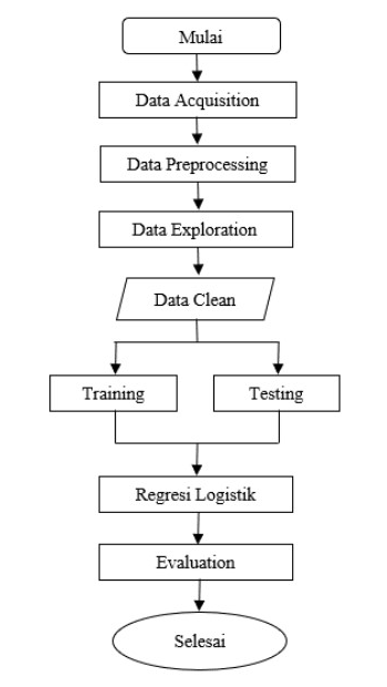

**PENJELASAN DATASET**

Dataset yang digunakan adalah Pima Indians Diabetes Database, yang terdiri dari 768 baris dan 9 kolom, dengan 8 fitur independen dan 1 kolom label (Outcome).
Fitur yang tersedia meliputi:

- *Pregnancies* – jumlah kehamilan
- *Glucose* – kadar glukosa
- *BloodPressure* – tekanan darah
- *SkinThickness* – ketebalan kulit
- *Insulin* – kadar insulin
- *BMI* – indeks massa tubuh
- *DiabetesPedigreeFunction* – riwayat keluarga dengan diabetes
- *Age* – usia pasien
- *Outcome* – label (0 = tidak diabetes, 1 = diabetes)

**EDA**

1. Tidak ada nilai null (kosong), tapi ada nilai 0 yang tidak logis di beberapa
2. kolom medis seperti Glucose, BloodPressure, BMI, SkinThickness, dan Insulin.
3. Distribusi kelas pada label (Outcome) cukup imbang: sebagian besar pasien tidak diabetes.
4. Korelasi tertinggi ke Outcome adalah Glucose, BMI, dan Age.

**PROSES FEATURE DATASET**

- Nilai 0 pada kolom medis dianggap sebagai missing value dan diganti menggunakan mean (rata-rata) dari masing-masing kolom.
- Semua fitur numerik kemudian dinormalisasi menggunakan StandardScaler agar memiliki skala yang seimbang.
- Data kemudian dibagi menjadi 75% untuk pelatihan dan 25% untuk pengujian.

**MODELING**

1. Pisahkan fitur (X) dan label (y):
X berisi semua kolom kecuali Outcome,
y berisi kolom Outcome yang berisi label diabetes (0/1)
-->
code :
X = df.drop('Outcome', axis=1)
y = df['Outcome']

2. Normalisasi fitur:
Menggunakan StandardScaler untuk menyeimbangkan skala antar fitur
-->
code :
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Split data training & testing:
Menggunakan train_test_split, dengan 75% data untuk pelatihan dan 25% untuk pengujian
-->
code :
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)
4. Latih model Logistic Regression:
Menggunakan model.fit(X_train, y_train)
-->
code :
model = LogisticRegression()
model.fit(X_train, y_train)
5. Prediksi:
Menggunakan model.predict(X_test)
-->
code :
y_pred = model.predict(X_test)

**EVALUASI MODEL**

- Akurasi: Persentase prediksi benar dari seluruh prediksi
- Precision: Akurasi dari prediksi positif (berapa banyak yang benar-benar diabetes dari yang diprediksi diabetes)
- Recall: Kemampuan model dalam menangkap kasus positif sebenarnya (berapa banyak - pasien diabetes yang berhasil dikenali)
- F1-score: Rata-rata harmonik dari precision dan recall
- Confusion Matrix: Matriks yang menunjukkan distribusi prediksi benar dan salah

**DISKUSI HASIL**

**Berdasarkan hasil evaluasi model:**

- Model Logistic Regression mencapai akurasi sebesar 73%
- Precision untuk kelas 1 (diabetes) sebesar 63%, dan recall sebesar 59%
- Artinya, dari semua pasien yang benar-benar diabetes, hanya sekitar 59% yang berhasil dikenali model (masih ada beberapa kasus yang terlewat → false negative)
- Hasil ini masih bisa ditingkatkan dengan model yang lebih kompleks (misal: Random Forest, XGBoost) atau dengan penyeimbangan data

**Confusion matrix menunjukkan bahwa:**

- 99 pasien tidak diabetes terdeteksi dengan benar (True Negative)
- 41 pasien diabetes terdeteksi dengan benar (True Positive)
- 28 pasien diabetes salah dikira tidak diabetes (False Negative)
- 24 pasien sehat salah dikira diabetes (False Positive)

**KESIMPULAN**

Model Logistic Regression yang dibangun dalam proyek ini memiliki performa yang cukup baik sebagai baseline model untuk prediksi diabetes. Dengan akurasi 73%, model ini mampu memberikan gambaran awal terhadap risiko diabetes berdasarkan fitur-fitur kesehatan pasien.

Meskipun belum sempurna, model ini dapat dijadikan dasar untuk pengembangan sistem deteksi dini, terutama jika ditingkatkan dengan metode ensemble learning dan tuning hyperparameter.

In [79]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Path ke file di Google Drive
file_path = "/content/drive/My Drive/content/diabetes.csv"

# Baca file CSV
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# Cek ukuran dataset
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (768, 9)


In [ ]:
# Cek tipe data di setiap kolom dan non-null count
print("\nInformasi kolom:")
print(df.info())


Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
# Cek statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.0

In [ ]:
# Cek jumlah nilai kosong di setiap kolom
print("\nJumlah nilai kosong per kolom:")
print(df.isnull().sum())


Jumlah nilai kosong per kolom:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Cek jumlah nilai 0 di kolom yang seharusnya tidak 0
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_check:
    print(f"{col} - jumlah nilai 0:", (df[col] == 0).sum())

Glucose - jumlah nilai 0: 5
BloodPressure - jumlah nilai 0: 35
SkinThickness - jumlah nilai 0: 227
Insulin - jumlah nilai 0: 374
BMI - jumlah nilai 0: 11


In [ ]:
# List kolom yang akan dicek dan diganti nilai 0-nya
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
# Ganti nilai 0 dengan mean dari masing-masing kolom
for col in cols_to_replace:
    mean_value = df[col][df[col] != 0].mean()  # hitung mean tanpa nilai 0
    df[col] = df[col].replace(0, mean_value)

In [ ]:
for col in cols_to_replace:
    print(f"{col} - jumlah nilai 0 setelah imputasi:", (df[col] == 0).sum())

Glucose - jumlah nilai 0 setelah imputasi: 0
BloodPressure - jumlah nilai 0 setelah imputasi: 0
SkinThickness - jumlah nilai 0 setelah imputasi: 0
Insulin - jumlah nilai 0 setelah imputasi: 0
BMI - jumlah nilai 0 setelah imputasi: 0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Pisahkan fitur (X) dan label (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split data jadi 75% training dan 25% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)

In [ ]:
# Training model Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Prediksi hasil
y_pred = model.predict(X_test)

In [ ]:
# Prediksi probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Ubah ambang batas threshold jadi 0.4 (lebih sensitif)
y_pred_custom = (y_proba >= 0.4).astype(int)

In [ ]:
# Evaluasi ulang
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")

Akurasi model: 0.73


In [ ]:
# Tampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.63      0.59      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

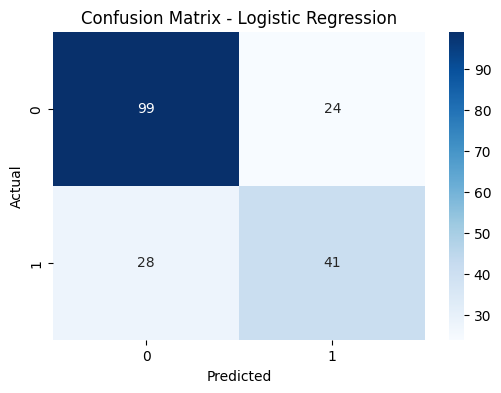

In [ ]:
# Visualisasi matrix-nya
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

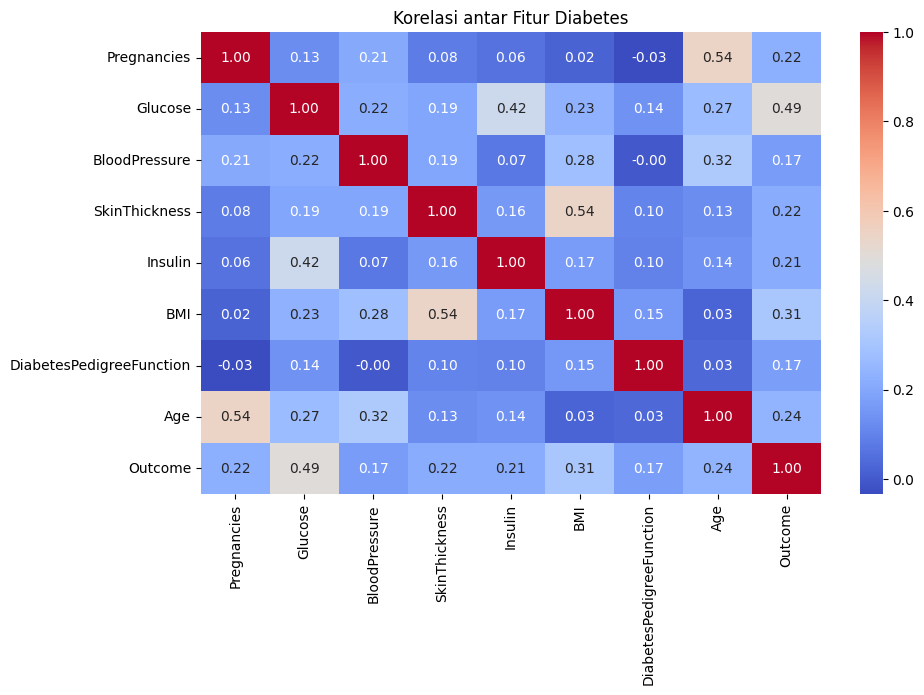

In [ ]:
# Heatmap korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Fitur Diabetes")
plt.show()

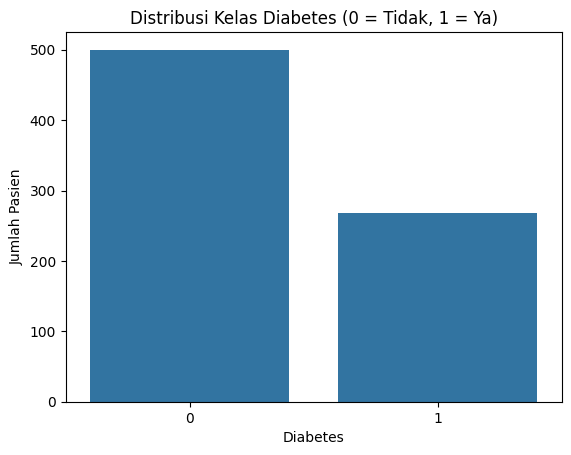

In [ ]:
sns.countplot(x='Outcome', data=df)
plt.title("Distribusi Kelas Diabetes (0 = Tidak, 1 = Ya)")
plt.xlabel("Diabetes")
plt.ylabel("Jumlah Pasien")
plt.show()

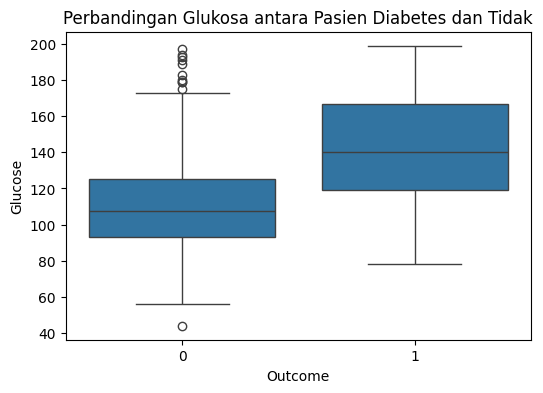

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Perbandingan Glukosa antara Pasien Diabetes dan Tidak")
plt.xlabel("Outcome")
plt.ylabel("Glucose")
plt.show()

In [ ]:
# Tampilkan 10 hasil prediksi pertama
for i in range(10):
    print(f"Prediksi: {y_pred[i]}  |  Aktual: {y_test.values[i]}")

Prediksi: 0  |  Aktual: 0
Prediksi: 0  |  Aktual: 0
Prediksi: 0  |  Aktual: 0
Prediksi: 0  |  Aktual: 0
Prediksi: 0  |  Aktual: 0
Prediksi: 0  |  Aktual: 0
Prediksi: 0  |  Aktual: 0
Prediksi: 0  |  Aktual: 0
Prediksi: 1  |  Aktual: 0
Prediksi: 1  |  Aktual: 0
